In [319]:
dset=pd.read_csv("train.csv")

In [320]:
dset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [321]:
dset.shape

(614, 13)

In [322]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [323]:
dset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [324]:
pd.crosstab(dset['Credit_History'],dset['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<Axes: >

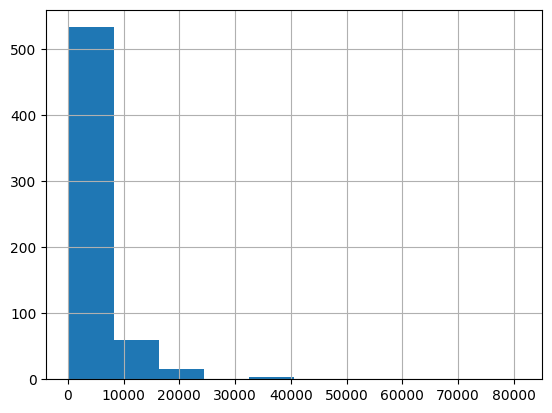

In [325]:
dset['ApplicantIncome'].hist()

<Axes: >

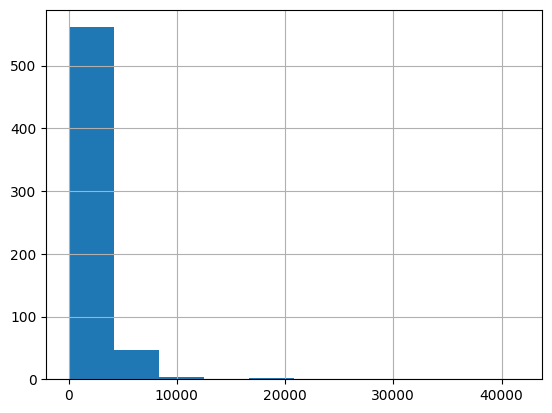

In [326]:
dset['CoapplicantIncome'].hist()

<Axes: >

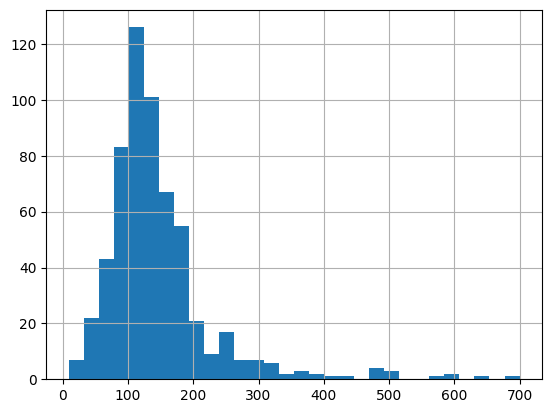

In [327]:
dset['LoanAmount'].hist(bins=30)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

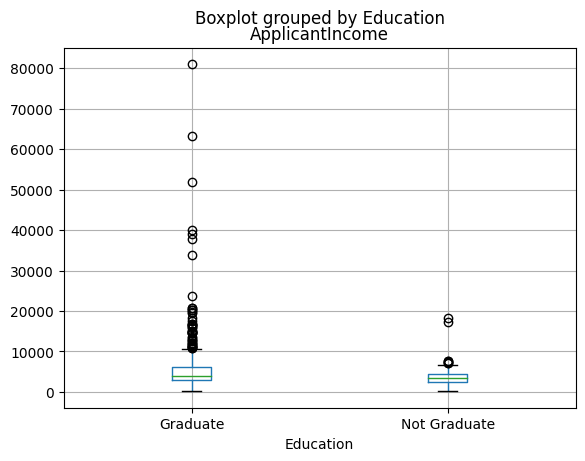

In [328]:
dset.boxplot(column="ApplicantIncome", by="Education")

In [329]:
dset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [330]:
dset["Gender"].fillna(dset["Gender"].mode()[0], inplace=True)
dset["Married"].fillna(dset["Married"].mode()[0], inplace=True)
dset["Dependents"].fillna(dset["Dependents"].mode()[0], inplace=True)
dset["Education"].fillna(dset["Education"].mode()[0], inplace=True)
dset["Self_Employed"].fillna(dset["Self_Employed"].mode()[0], inplace=True)
dset["Credit_History"].fillna(dset["Credit_History"].mode()[0], inplace=True)
dset["Loan_Amount_Term"].fillna(dset["Loan_Amount_Term"].mode()[0], inplace=True)


In [331]:
dset.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [332]:
dset["LoanAmount"].fillna(value=int(dset["LoanAmount"].mean()), inplace=True)

In [333]:
dset["LoanAmt_Log"]=np.log(dset["LoanAmount"])
dset["TotalIncome_Log"]=np.log(dset["ApplicantIncome"]+dset["CoapplicantIncome"])

<Axes: >

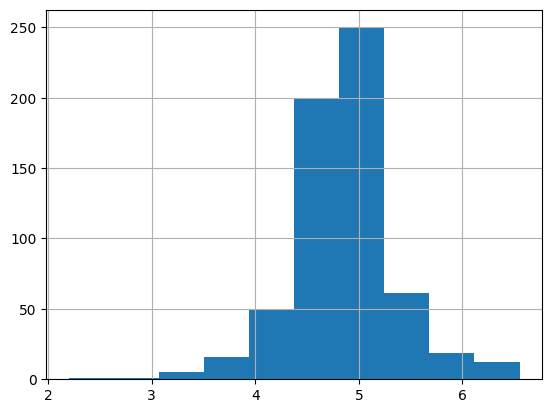

In [334]:
dset["LoanAmt_Log"].hist()


<Axes: >

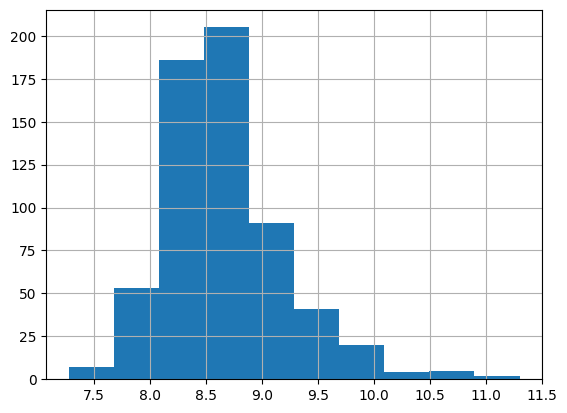

In [335]:
dset["TotalIncome_Log"].hist()

In [336]:
x=dset.iloc[:,np.r_[1:5,9:11,13:14]].values
y=dset.iloc[:, 12].values

In [337]:
x

array([['Male', 'No', '0', ..., 360.0, 1.0, 4.983606621708336],
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 4.852030263919617],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 4.189654742026425],
       ...,
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 5.53338948872752],
       ['Male', 'Yes', '2', ..., 360.0, 1.0, 5.231108616854587],
       ['Female', 'No', '0', ..., 360.0, 0.0, 4.890349128221754]],
      dtype=object)

In [338]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [339]:
from sklearn.model_selection import train_test_split

In [340]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=0)

In [341]:
from sklearn.preprocessing import LabelEncoder
Lencoder_x=LabelEncoder()

In [342]:
for i in range(0, 5):
    xtrain[:,i]=Lencoder_x.fit_transform(xtrain[:,i])

In [343]:
xtrain[:,6]=Lencoder_x.fit_transform(xtrain[:,6])

In [344]:
xtrain

array([[1, 1, 0, ..., 7, 1.0, 80],
       [1, 0, 1, ..., 7, 1.0, 130],
       [1, 1, 0, ..., 7, 0.0, 97],
       ...,
       [1, 1, 3, ..., 7, 1.0, 131],
       [1, 1, 0, ..., 7, 1.0, 107],
       [0, 1, 0, ..., 7, 1.0, 121]], dtype=object)

In [345]:
Lencoder_y=LabelEncoder()
ytrain=Lencoder_y.fit_transform(ytrain)

In [346]:
ytrain

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [347]:
Lencoder_x=LabelEncoder()
for i in range(0, 5):
    xtest[:,i]=Lencoder_x.fit_transform(xtest[:,i])

In [348]:
xtest[:,6]=Lencoder_x.fit_transform(xtest[:,6])

In [349]:
xtest

array([[1, 0, 0, 0, 5, 1.0, 10],
       [0, 0, 0, 0, 5, 1.0, 24],
       [1, 1, 0, 0, 5, 1.0, 71],
       [1, 1, 0, 0, 5, 1.0, 22],
       [1, 1, 2, 0, 5, 1.0, 16],
       [1, 1, 0, 1, 3, 0.0, 48],
       [1, 1, 3, 0, 3, 1.0, 45],
       [1, 0, 0, 0, 5, 1.0, 72],
       [1, 0, 0, 0, 5, 0.0, 30],
       [1, 1, 0, 0, 5, 1.0, 33],
       [0, 0, 0, 0, 5, 1.0, 10],
       [1, 1, 1, 0, 5, 1.0, 14],
       [0, 0, 0, 0, 5, 1.0, 68],
       [1, 1, 2, 0, 5, 1.0, 65],
       [1, 1, 0, 0, 5, 1.0, 15],
       [1, 1, 1, 0, 5, 1.0, 3],
       [1, 0, 1, 1, 5, 1.0, 58],
       [1, 0, 0, 1, 5, 1.0, 35],
       [0, 0, 0, 0, 5, 1.0, 13],
       [1, 1, 0, 1, 5, 0.0, 55],
       [0, 1, 0, 0, 5, 0.0, 28],
       [1, 1, 0, 0, 5, 1.0, 42],
       [1, 1, 2, 0, 5, 1.0, 21],
       [1, 1, 2, 0, 5, 1.0, 48],
       [1, 1, 0, 0, 5, 1.0, 2],
       [1, 1, 1, 0, 5, 1.0, 66],
       [1, 0, 0, 0, 5, 1.0, 57],
       [1, 1, 0, 0, 5, 1.0, 57],
       [1, 1, 3, 0, 5, 0.0, 33],
       [0, 0, 0, 0, 5, 0.0, 18],
       [1, 1

In [350]:
Lencoder_y=LabelEncoder()
ytest=Lencoder_y.fit_transform(ytest)

In [351]:
ytest

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [352]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)

In [353]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy' , random_state=0)
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [354]:
ypredict=dtc.predict(xtest)
ypredict

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [355]:
from sklearn import metrics
print(metrics.accuracy_score(ypredict,ytest))

0.6504065040650406


In [356]:
from sklearn.naive_bayes import GaussianNB
nbc=GaussianNB()
nbc.fit(xtrain,ytrain)

GaussianNB()

In [357]:
ypredict2=nbc.predict(xtest)
ypredict2

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [358]:
print(metrics.accuracy_score(ypredict2,ytest))

0.8292682926829268


In [359]:
testd=pd.read_csv("test.csv")
testd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [360]:
testd["Gender"].fillna(testd["Gender"].mode()[0], inplace=True)
testd["Married"].fillna(testd["Married"].mode()[0], inplace=True)
testd["Dependents"].fillna(testd["Dependents"].mode()[0], inplace=True)
testd["Education"].fillna(testd["Education"].mode()[0], inplace=True)
testd["Self_Employed"].fillna(testd["Self_Employed"].mode()[0], inplace=True)
testd["Credit_History"].fillna(testd["Credit_History"].mode()[0], inplace=True)
testd["Loan_Amount_Term"].fillna(testd["Loan_Amount_Term"].mode()[0], inplace=True)

In [361]:
testd["LoanAmount"].fillna(value=int(testd["LoanAmount"].mean()), inplace=True)

In [362]:
testd.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [363]:
testd["LoanAmt_Log"]=np.log(testd["LoanAmount"])
testd["TotalIncome_Log"]=np.log(testd["ApplicantIncome"]+testd["CoapplicantIncome"])

In [364]:
dset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmt_Log,TotalIncome_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y,4.983607,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,4.262680,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,3.688879,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.533389,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,5.231109,8.933664


In [365]:
testd

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmt_Log,TotalIncome_Log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,8.094378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,4.727388,8.663196
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4.744932,8.490233
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,4.836282,8.564649
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,5.062595,8.908289


In [366]:
testd.shape

(367, 14)

In [367]:
test=testd.iloc[:,np.r_[1:5,9:11,13:14]].values

In [368]:
for i in range(0, 5):
    test[:,i]=Lencoder_x.fit_transform(test[:,i])
test[:,6]=Lencoder_x.fit_transform(test[:,6])

In [369]:
test=ss.fit_transform(test)

In [370]:
predd=nbc.predict(test)
predd

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,